In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
# First, create array for latitudes and longitudes, that we'll declare as a variable,
# so they can be stored and accessed later.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
from citipy import citipy

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

63.83030232742806 61.509419654099105
5.941389783873703 -116.26816556808583
-43.84835116559411 23.850931422715433
-23.337195843897092 -131.03597028475951
-62.49406839421443 59.697934550188705
-54.70847765120764 -19.774107737244492
67.7681150684941 46.474842123200915
64.3800029341748 177.22284320328976
-25.657700282451586 -109.47757617328658
-33.0989961767432 175.88765051947428
85.63759937756055 119.60269765904025
72.72288542239392 88.39850166352608
-63.37738878987267 30.139485192072414
-29.40525728816303 -18.974563477397936
35.87949222655193 107.48206408300018
37.85630306103569 -67.62013229360242
-69.82733317841439 65.26328917537182
-89.22601677905041 94.8822880051398
-85.51418959338402 -1.3818233363408012
63.80323402914928 -63.900905170066224
-68.84109019138465 -76.04357987398991
-19.91709527365775 53.18306180536044
61.16958543307578 88.20485255748702
2.3928374579915754 -122.05524683778427
-74.92691383306361 -147.61275531373178
42.732488218006495 127.0047410671529
32.231604805015934 -3

In [22]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)   

qaanaaq gl
ushuaia ar
tubruq ly
sarkand kz
georgetown sh
busselton au
jamestown sh
tuktoyaktuk ca
nikolskoye ru
hermanus za
kruisfontein za
alekseyevsk ru
ushuaia ar
busselton au
luderitz na
fortuna us
albany au
chumikan ru
andenes no
chokurdakh ru
busselton au
saint george bm
solnechnyy ru
beisfjord no
barentsburg sj
puerto lempira hn
taoudenni ml
yellowknife ca
ergani tr
lebu cl
yamoto jp
yellowknife ca
atuona pf
qaanaaq gl
busselton au
vaini to
norman wells ca
san cristobal ec
ostrovnoy ru
yellowknife ca
port alfred za
rikitea pf
rudbar af
atuona pf
puerto ayora ec
cape town za
pasni pk
busselton au
gerash ir
henties bay na
kalmunai lk
taolanaro mg
ilulissat gl
hermanus za
kapaa us
georgetown sh
marcona pe
igarka ru
lae pg
vaini to
flinders au
hilo us
husavik is
palu id
chuy uy
forbes au
cayeli tr
barrow us
cape town za
brownsville us
khatanga ru
rikitea pf
weligama lk
axim gh
rikitea pf
malwan in
punta arenas cl
bengkulu id
sao filipe cv
atuona pf
saint-pierre pm
bredasdorp za
isir

atuona pf
punta arenas cl
puerto ayora ec
ushuaia ar
kahului us
kalmar se
albany au
ruatoria nz
katsuura jp
birobidzhan ru
tubruq ly
busselton au
karratha au
bredasdorp za
vaini to
lagoa pt
rikitea pf
warqla dz
vaini to
broken hill au
san quintin mx
kapaa us
necochea ar
mar del plata ar
busselton au
port alfred za
komsomolskiy ru
illoqqortoormiut gl
shira ru
rikitea pf
carnarvon au
busselton au
port alfred za
khatanga ru
terrace ca
vaini to
belmonte br
tsihombe mg
rikitea pf
albany au
faanui pf
havelock us
hermanus za
garowe so
yulara au
ushuaia ar
rikitea pf
saldanha za
meyungs pw
iqaluit ca
sobolevo ru
bathsheba bb
troitsk ru
santa eulalia del rio es
constitucion mx
touros br
atuona pf
arraial do cabo br
north bend us
cartagena co
busselton au
khatanga ru
yeppoon au
aflu dz
da nang vn
mar del plata ar
phan rang vn
umzimvubu za
illoqqortoormiut gl
pevek ru
maracaju br
rodrigues alves br
busselton au
new norfolk au
nikolskoye ru
biloela au
carnarvon au
chegdomyn ru
nelson bay au
mataur

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
# we added another feature to the URL: units=Imperial. Other option is metric.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d36b7cfa76097fcbc438ac09d9ad4804


In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters and initialize them at 1 
# because we want the first iteration of the logging for each recorded response and the set to start at 1.
record_count = 1
set_count = 1


# Loop Through the List of Cities and Build the City URL
# for i in range(len(cities)) will not be used due to programming errors 
# because it adds the index, not the city name, to the city_url
# Loop through all the cities in our list using enumerate() method as an alternative way
# to iterate through the list of cities and retrieve both the index, and the city from the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes. 
    # Once we get to 50, we tell the program to pause for 60 seconds using the time.sleep(60) command.
    # The OpenWeatherMap API only allows 60 calls for per minute on their free tier, so pausing our program
    # for one minute after each set of 50 will prevent time-out errors.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
    
    # Run an API request for each of the cities; use try-except block.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | agirish
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | plettenberg bay
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | mezen
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | russell
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | pingliang
Processing Record 15 of Set 1 | nantucket
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | pangnirtung
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | le port
Processing Record 21 of Set 1 | teguldet
Processing Record 22 of Set 1 | atuona
Pr

Processing Record 37 of Set 4 | noumea
Processing Record 38 of Set 4 | cururupu
Processing Record 39 of Set 4 | mananara
Processing Record 40 of Set 4 | sobolevo
Processing Record 41 of Set 4 | oistins
Processing Record 42 of Set 4 | nouadhibou
Processing Record 43 of Set 4 | edd
Processing Record 44 of Set 4 | komsomolskiy
Processing Record 45 of Set 4 | natitingou
Processing Record 46 of Set 4 | okahandja
Processing Record 47 of Set 4 | port hardy
Processing Record 48 of Set 4 | misratah
Processing Record 49 of Set 4 | presidente medici
Processing Record 50 of Set 4 | balikpapan
Processing Record 1 of Set 5 | alta floresta
Processing Record 2 of Set 5 | serebryanyy bor
Processing Record 3 of Set 5 | touros
Processing Record 4 of Set 5 | ciudad bolivar
Processing Record 5 of Set 5 | saint george
Processing Record 6 of Set 5 | jumla
Processing Record 7 of Set 5 | littleton
Processing Record 8 of Set 5 | bengkulu
Processing Record 9 of Set 5 | khipro
Processing Record 10 of Set 5 | scia

Processing Record 24 of Set 8 | arroio grande
Processing Record 25 of Set 8 | riyadh
Processing Record 26 of Set 8 | korla
Processing Record 27 of Set 8 | krasnoturansk
Processing Record 28 of Set 8 | port lincoln
Processing Record 29 of Set 8 | lhuntshi
City not found. Skipping...
Processing Record 30 of Set 8 | gaoual
Processing Record 31 of Set 8 | andilamena
Processing Record 32 of Set 8 | pulaski
Processing Record 33 of Set 8 | masakin
Processing Record 34 of Set 8 | narsaq
Processing Record 35 of Set 8 | lagoa
Processing Record 36 of Set 8 | batavia
Processing Record 37 of Set 8 | khorixas
Processing Record 38 of Set 8 | lukang
Processing Record 39 of Set 8 | esteli
Processing Record 40 of Set 8 | tecoanapa
Processing Record 41 of Set 8 | snezhnogorsk
Processing Record 42 of Set 8 | havoysund
Processing Record 43 of Set 8 | ambovombe
Processing Record 44 of Set 8 | sistranda
Processing Record 45 of Set 8 | tshikapa
Processing Record 46 of Set 8 | margate
Processing Record 47 of S

Processing Record 14 of Set 12 | kawhia
Processing Record 15 of Set 12 | empangeni
Processing Record 16 of Set 12 | acari
Processing Record 17 of Set 12 | kalemie
Processing Record 18 of Set 12 | hillsborough
Processing Record 19 of Set 12 | panaba
Processing Record 20 of Set 12 | nhulunbuy
Processing Record 21 of Set 12 | utiroa
City not found. Skipping...
Processing Record 22 of Set 12 | kelowna
Processing Record 23 of Set 12 | fortuna
Processing Record 24 of Set 12 | yabelo
Processing Record 25 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 26 of Set 12 | qaqortoq
Processing Record 27 of Set 12 | gorontalo
Processing Record 28 of Set 12 | sibut
Processing Record 29 of Set 12 | cidreira
Processing Record 30 of Set 12 | verkhnyaya inta
Processing Record 31 of Set 12 | upata
Processing Record 32 of Set 12 | sokoni
Processing Record 33 of Set 12 | nizhniy kuranakh
Processing Record 34 of Set 12 | srivardhan
Processing Record 35 of Set 12 | kirovsk
Processing Record 

In [14]:
# After collecting all our data, tally the number of cities in the city_data array of dictionaries using the len() function.
len(city_data)

573

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Agirish,61.9247,63.0231,-9.71,95,18,1.50,RU,2022-11-16 16:53:37
1,San Patricio,28.0170,-97.5169,49.87,64,100,10.69,US,2022-11-16 16:53:37
2,Plettenberg Bay,-34.0527,23.3716,62.60,72,65,2.73,ZA,2022-11-16 16:53:37
3,Rikitea,-23.1203,-134.9692,74.50,86,100,24.67,PF,2022-11-16 16:49:17
4,Arraial Do Cabo,-22.9661,-42.0278,78.76,83,75,11.50,BR,2022-11-16 16:53:38
5,Mezen,65.8522,44.2400,25.86,94,24,5.88,RU,2022-11-16 16:53:38
6,Anadyr,64.7500,177.4833,37.90,81,0,17.90,RU,2022-11-16 16:53:38
7,Russell,32.3502,-85.1999,52.41,62,0,9.22,US,2022-11-16 16:53:39
8,Saskylakh,71.9167,114.0833,-25.92,97,100,5.53,RU,2022-11-16 16:53:39
9,Talnakh,69.4865,88.3972,-22.70,99,39,6.44,RU,2022-11-16 16:53:39


In [16]:
# To reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:

columnsTitles = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Then, we assign the same DataFrame with new column order using reindex() function
city_data_df = pd.DataFrame(city_data).reindex(columns=columnsTitles)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Agirish,RU,2022-11-16 16:53:37,61.9247,63.0231,-9.71,95,18,1.50
1,San Patricio,US,2022-11-16 16:53:37,28.0170,-97.5169,49.87,64,100,10.69
2,Plettenberg Bay,ZA,2022-11-16 16:53:37,-34.0527,23.3716,62.60,72,65,2.73
3,Rikitea,PF,2022-11-16 16:49:17,-23.1203,-134.9692,74.50,86,100,24.67
4,Arraial Do Cabo,BR,2022-11-16 16:53:38,-22.9661,-42.0278,78.76,83,75,11.50
5,Mezen,RU,2022-11-16 16:53:38,65.8522,44.2400,25.86,94,24,5.88
6,Anadyr,RU,2022-11-16 16:53:38,64.7500,177.4833,37.90,81,0,17.90
7,Russell,US,2022-11-16 16:53:39,32.3502,-85.1999,52.41,62,0,9.22
8,Saskylakh,RU,2022-11-16 16:53:39,71.9167,114.0833,-25.92,97,100,5.53
9,Talnakh,RU,2022-11-16 16:53:39,69.4865,88.3972,-22.70,99,39,6.44


In [17]:
# Create the output file (CSV).
output_data_file = "../World Weather Analysis/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [44]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidities = city_data_df["Humidity"]
cloudinesses = city_data_df["Cloudiness"]
wind_speeds = city_data_df["Wind Speed"]

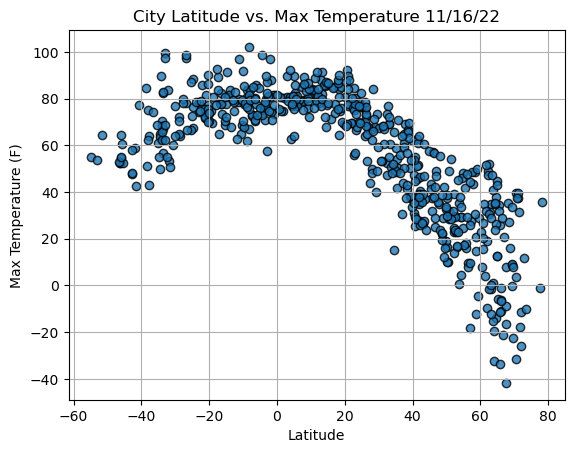

In [70]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [71]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [72]:
# Linear regression between City Latitude and Max Temperature
linregress(lats, max_temps)

LinregressResult(slope=-0.6003436045359144, intercept=67.93181395876351, rvalue=-0.7120503703186858, pvalue=9.419471886919282e-90, stderr=0.024773516016641926, intercept_stderr=0.9589395319415692)

In [73]:
# Perform linear regression and save the results as tuple.

(slope, intercept, rval, pval, stderr) = linregress(lats, max_temps)

In [49]:
# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {pval:.5f}")

y = -0.6x + 67.93
The p-value is: 0.00000


In [77]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

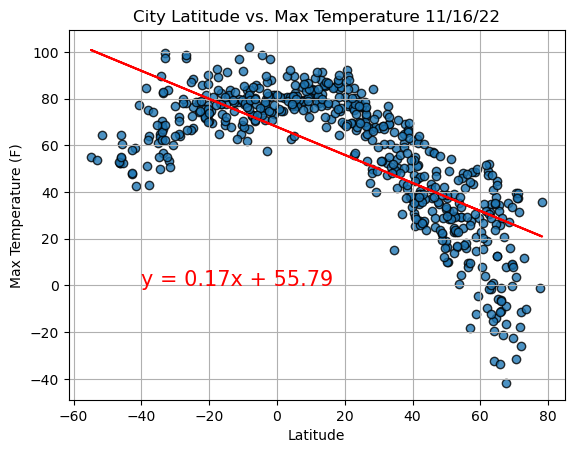

In [78]:
# Import time module
import time


# Create a scatter plot of the x and y values.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Plot the REGRESSION LINE with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values, "r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-40,0), fontsize=15, color="red")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.show()

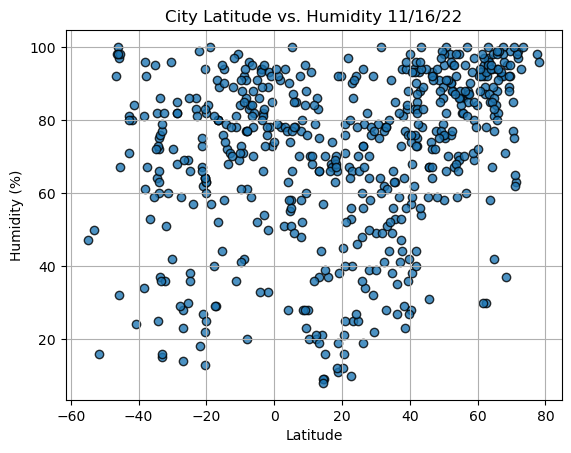

In [79]:
# Build the scatter plots for latitude vs. Humidity.
plt.scatter(lats,
            humidities,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [80]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [81]:
# Linear regression between City Latitude and Humidity
linregress(lats, humidities)

LinregressResult(slope=0.17690575180808407, intercept=67.12282628104334, rvalue=0.25597529627578086, pvalue=5.03869065606657e-10, stderr=0.027958255636782618, intercept_stderr=1.0822152397031135)

In [82]:
# Perform linear regression and save the results as tuple.

(slope, intercept, rval, pval, stderr) = linregress(lats, humidities)

In [83]:
# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {pval:.5f}")

y = 0.18x + 67.12
The p-value is: 0.00000


In [84]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

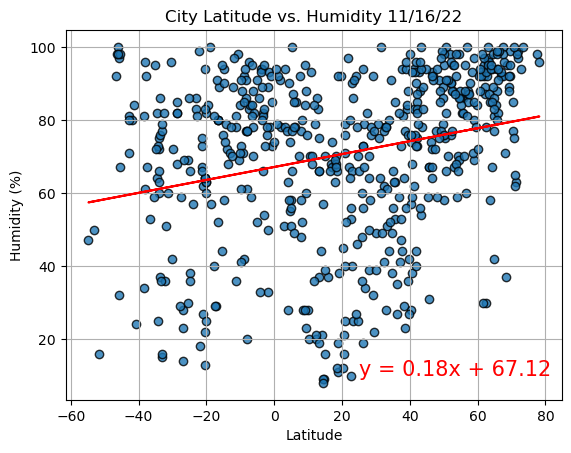

In [88]:
# Import time module
import time


# Create a scatter plot of the x and y values.
plt.scatter(lats,
            humidities,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Plot the REGRESSION LINE with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values, "r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (25,10), fontsize=15, color="red")
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

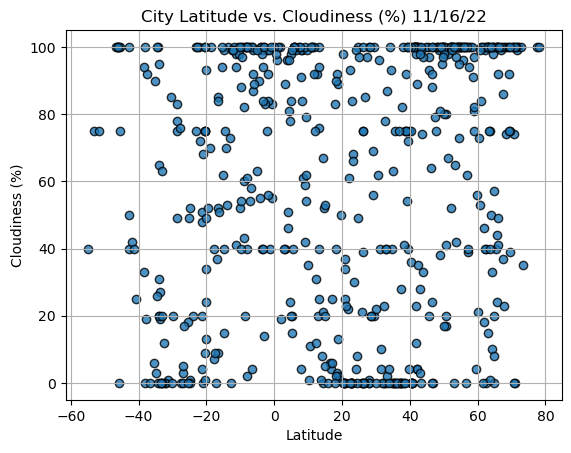

In [90]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudinesses,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [91]:
# Linear regression between City Latitude and Cloudiness
linregress(lats, cloudinesses)

LinregressResult(slope=0.16655591860781216, intercept=55.791707710439354, rvalue=0.14118576721203616, pvalue=0.0007008811698793851, stderr=0.04887411289342196, intercept_stderr=1.8918315393985152)

In [92]:
# Perform linear regression and save the results as tuple.

(slope, intercept, rval, pval, stderr) = linregress(lats, cloudinesses)

In [93]:
# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {pval:.5f}")

y = 0.17x + 55.79
The p-value is: 0.00070


In [94]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

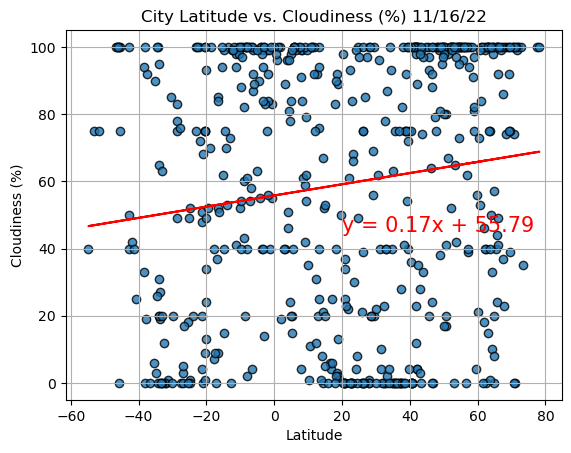

In [96]:
# Import time module
import time


# Create a scatter plot of the x and y values.
plt.scatter(lats,
            cloudinesses,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Plot the REGRESSION LINE with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values, "r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (20,45), fontsize=15, color="red")
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

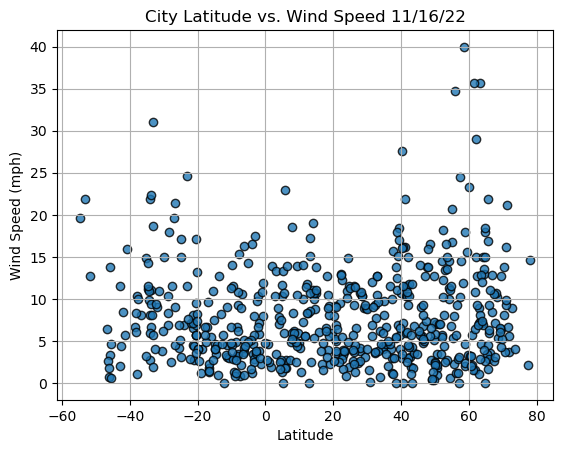

In [97]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speeds,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [98]:
# Linear regression between City Latitude and Wind Speed
linregress(lats, wind_speeds)

LinregressResult(slope=0.010932819701478632, intercept=7.5384515545551904, rvalue=0.06291527463076999, pvalue=0.1325218861778609, stderr=0.007257662837150407, intercept_stderr=0.28093145112593193)

In [99]:
# Perform linear regression and save the results as tuple.

(slope, intercept, rval, pval, stderr) = linregress(lats, wind_speeds)

In [100]:
# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {pval:.5f}")

y = 0.01x + 7.54
The p-value is: 0.13252


In [101]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

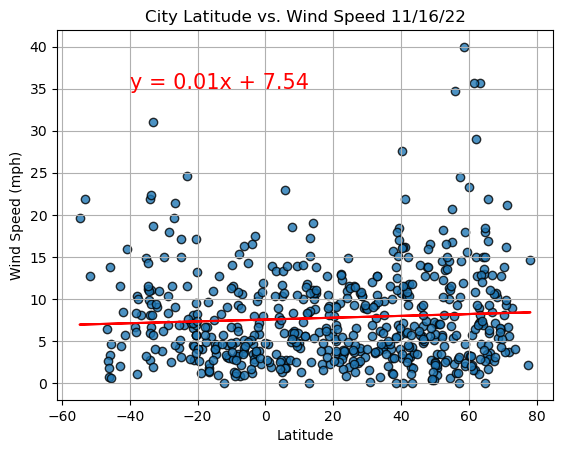

In [103]:
# Import time module
import time


# Create a scatter plot of the x and y values.
plt.scatter(lats,
            wind_speeds,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Plot the REGRESSION LINE with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values, "r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-40,35), fontsize=15, color="red")
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

In [128]:
index13 = city_data_df.loc[13]
index13

City                    Nantucket
Country                        US
Date          2022-11-16 16:51:20
Lat                       41.2835
Lng                      -70.0995
Max Temp                    62.74
Humidity                       94
Cloudiness                    100
Wind Speed                  16.11
Name: 13, dtype: object

In [129]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Agirish,RU,2022-11-16 16:53:37,61.9247,63.0231,-9.71,95,18,1.50
1,San Patricio,US,2022-11-16 16:53:37,28.0170,-97.5169,49.87,64,100,10.69
5,Mezen,RU,2022-11-16 16:53:38,65.8522,44.2400,25.86,94,24,5.88
6,Anadyr,RU,2022-11-16 16:53:38,64.7500,177.4833,37.90,81,0,17.90
7,Russell,US,2022-11-16 16:53:39,32.3502,-85.1999,52.41,62,0,9.22
...,...,...,...,...,...,...,...,...,...
565,Boda,CF,2022-11-16 17:08:27,4.3189,17.4695,77.54,58,96,1.63
566,Mongo,TD,2022-11-16 17:08:27,12.1844,18.6930,84.36,21,31,8.37
570,Berlevag,NO,2022-11-16 17:08:28,70.8578,29.0864,37.40,75,0,16.11
571,Greenwood,US,2022-11-16 17:08:28,34.1668,-82.1165,52.16,52,100,4.61


In [130]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Agirish,RU,2022-11-16 16:53:37,61.9247,63.0231,-9.71,95,18,1.50
1,San Patricio,US,2022-11-16 16:53:37,28.0170,-97.5169,49.87,64,100,10.69
5,Mezen,RU,2022-11-16 16:53:38,65.8522,44.2400,25.86,94,24,5.88
6,Anadyr,RU,2022-11-16 16:53:38,64.7500,177.4833,37.90,81,0,17.90
7,Russell,US,2022-11-16 16:53:39,32.3502,-85.1999,52.41,62,0,9.22


In [131]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [ ]:
# Linear Regression on the Southern Hemisphere for Maximum Temperature

In [135]:
# Create a Linear Regression Function

# Import linregress
from scipy.stats import linregress

# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

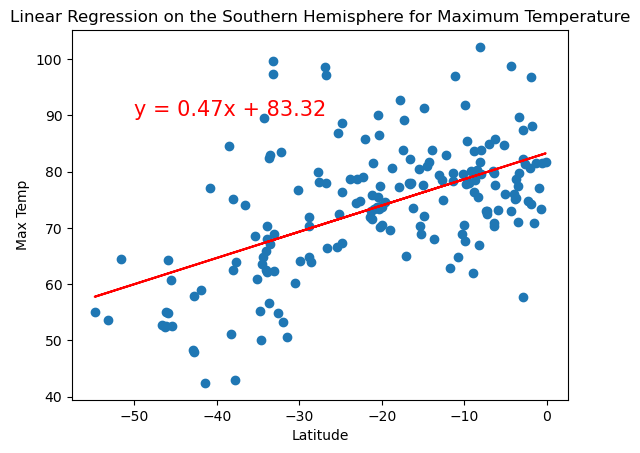

In [136]:
# Import linregress
from scipy.stats import linregress

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Maximum Temperature", 'Max Temp',(-50,90))

In [143]:
# Linear Regression on the Northern Hemisphere for Maximum Temperature

In [144]:
# Import linregress
from scipy.stats import linregress

# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

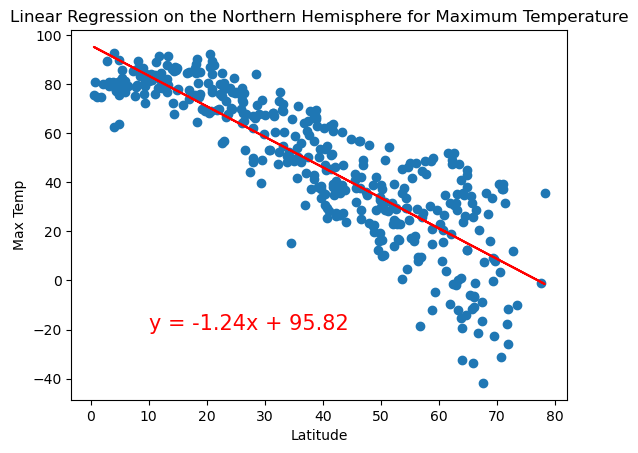

In [153]:
# Import linregress
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", 'Max Temp',(10,-20))

In [162]:
# Linear Regression on the Northern Hemisphere for the Percent Humidity

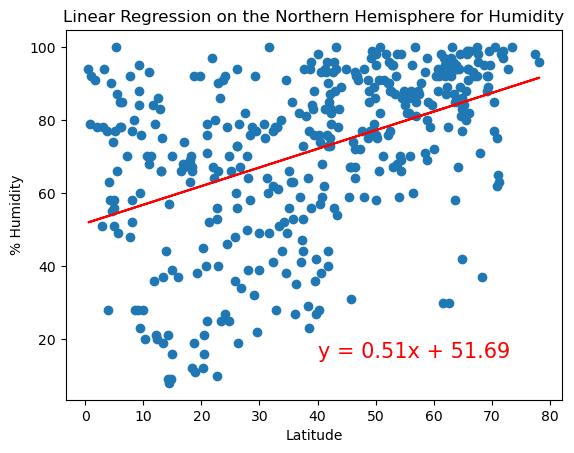

In [163]:
# Import linregress
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Humidity", '% Humidity',(40,15))

In [164]:
# Linear Regression on the Southern Hemisphere for the Percent Humidity

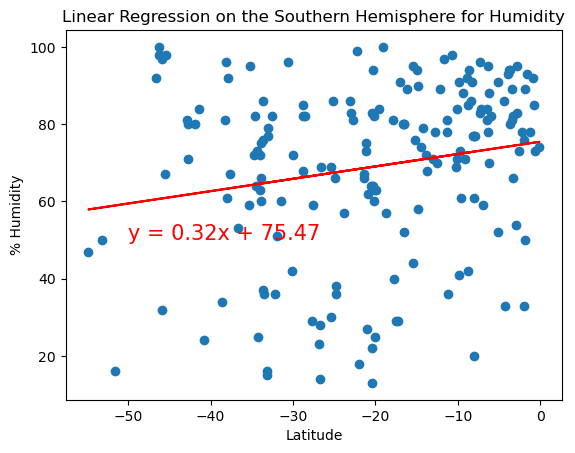

In [165]:
# Import linregress
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Humidity", '% Humidity',(-50,50))

In [166]:
# Linear Regression on the Northern Hemisphere for the Percent Cloudiness

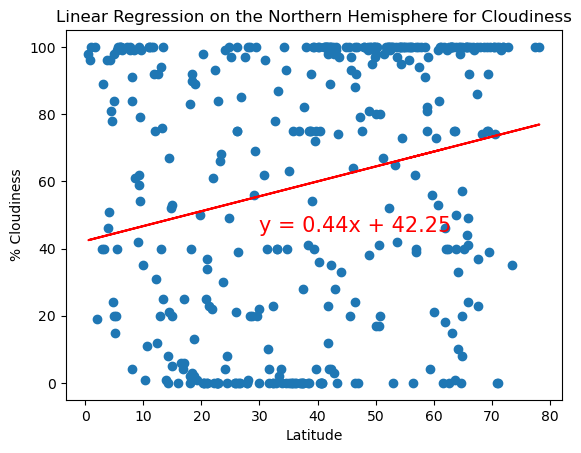

In [167]:
# Import linregress
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Cloudiness", '% Cloudiness',(30,45))

In [168]:
# Linear Regression on the Southern Hemisphere for the Percent Cloudiness

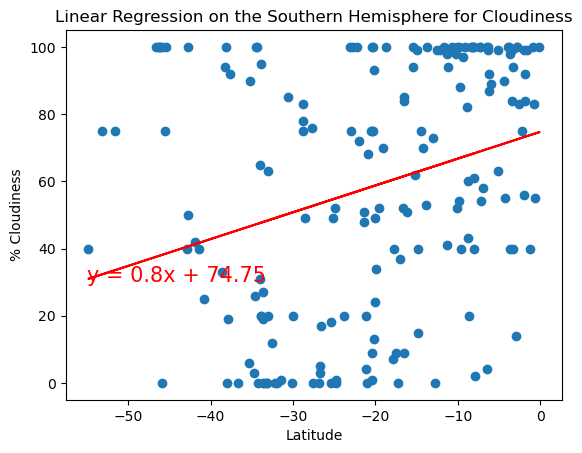

In [169]:
# Import linregress
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Cloudiness", '% Cloudiness',(-55,30))

In [170]:
# Linear Regression on the Southern Hemisphere for the Wind Speed

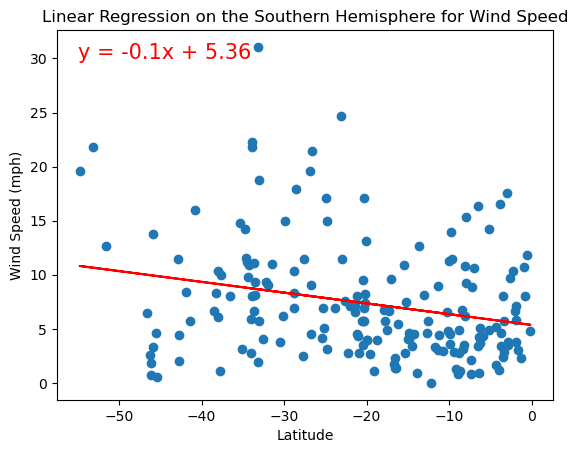

In [171]:
# Import linregress
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Wind Speed", 'Wind Speed (mph)',(-55,30))

In [172]:
# Linear Regression on the Northern Hemisphere for the Wind Speed

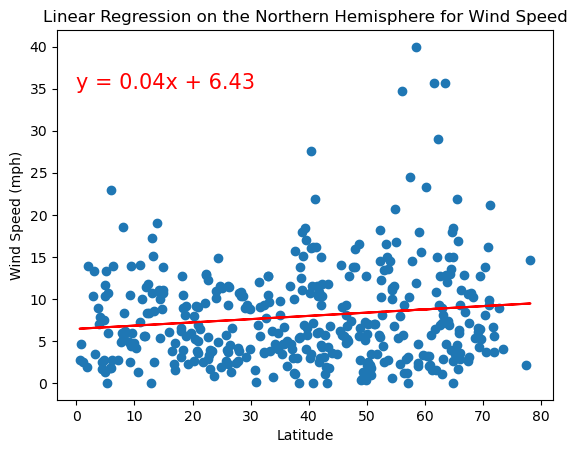

In [176]:
# Import linregress
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Wind Speed", 'Wind Speed (mph)',(0,35))

In [5]:
pip install gmaps

     ---------------------------------------- 1.1/1.1 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076090 sha256=8596588c19161db8ef5e86644b4ae03e0279fc77c0a3a20c0b3aadc0c09f7708
  Stored in directory: c:\users\coucoucka\appdata\local\pip\cache\wheels\66\ab\29\3032938612273665f0fa4d2fab4e3ecfe86480eaaa40aaee91
Successfully built gmaps
Note: you may need to restart the kernel to use updated packages.


In [5]:
!jupyter nbextension enable --py --sys-prefix gmaps

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok
